### Imports

In [40]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
# import seaborn as sns

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### GPU?

In [18]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Preprocessing

In [19]:
training_imgs = tf.keras.utils.image_dataset_from_directory(
    'data/train',
    labels="inferred", # Folder names will be used for labels
    label_mode="categorical",  # Not int
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


2024-06-23 20:58:32.938715: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.951894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.952898: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.956224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.956999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.958360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.959432: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:32.960115: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [20]:
valid_imgs = tf.keras.utils.image_dataset_from_directory(
    'data/valid',
    labels="inferred", # Folder names will be used for labels
    label_mode="categorical",  # Not int
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


2024-06-23 20:58:35.748163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.753515: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.754409: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.757602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.758428: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.759678: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.760714: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:35.761406: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


### Build the model

In [21]:
# Create the model object
model = Sequential()

In [22]:
# Add the layers
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

2024-06-23 20:58:40.325945: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.327706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.337987: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.339848: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.354507: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.356358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.366393: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.367986: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40.380917: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:40

In [23]:
model.add(Dropout(0.25))

In [24]:
# Flattening
model.add(Flatten())

In [25]:
# Add the dense (hidden) layer
model.add(Dense(units=1500, activation="relu"))

2024-06-23 20:58:45.525699: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:45.527722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [26]:
model.add(Dropout(0.4))

In [27]:
# Add the output layer
model.add(Dense(units=38, activation="softmax"))  # --> Probability of each class, then find the max

2024-06-23 20:58:48.383465: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:48.385503: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


### Compile the model

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

### Check out the structure of the model

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

### Training

In [30]:
training_history = model.fit(x=training_imgs, validation_data=valid_imgs, epochs=10)

Epoch 1/10


2024-06-23 20:58:54.919513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.920508: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.921353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.922174: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.923013: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.923868: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.924677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.925497: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54.926319: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 20:58:54

4394/4394 [==============================] - ETA: 0s - loss: 1.3465 - accuracy: 0.6010

2024-06-23 21:00:17.695207: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.695861: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.696405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.708766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.822284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.828098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:17.830688: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 87s 20ms/step - loss: 1.3465 - accuracy: 0.6010 - val_loss: 0.6114 - val_accuracy: 0.8036
Epoch 2/10
  10/4394 [..............................] - ETA: 1:14 - loss: 0.6781 - accuracy: 0.7750

2024-06-23 21:00:22.219418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:00:22.222230: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.4187 - accuracy: 0.8669

2024-06-23 21:01:43.076867: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:01:43.079461: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.4187 - accuracy: 0.8669 - val_loss: 0.2684 - val_accuracy: 0.9127
Epoch 3/10
  10/4394 [..............................] - ETA: 1:14 - loss: 0.2897 - accuracy: 0.9062

2024-06-23 21:01:47.497053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:01:47.499747: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.2379 - accuracy: 0.9226

2024-06-23 21:03:08.184266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:03:08.186828: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.2378 - accuracy: 0.9226 - val_loss: 0.2203 - val_accuracy: 0.9283
Epoch 4/10
  10/4394 [..............................] - ETA: 1:15 - loss: 0.3196 - accuracy: 0.9187

2024-06-23 21:03:12.403378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:03:12.407780: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.1624 - accuracy: 0.9475

2024-06-23 21:04:32.362894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:04:32.365433: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 84s 19ms/step - loss: 0.1624 - accuracy: 0.9475 - val_loss: 0.1555 - val_accuracy: 0.9500
Epoch 5/10
  10/4394 [..............................] - ETA: 1:14 - loss: 0.1605 - accuracy: 0.9375

2024-06-23 21:04:36.587373: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:04:36.590227: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.1216 - accuracy: 0.9606

2024-06-23 21:05:56.969013: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:05:56.971597: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.1216 - accuracy: 0.9606 - val_loss: 0.1627 - val_accuracy: 0.9492
Epoch 6/10
  10/4394 [..............................] - ETA: 1:15 - loss: 0.0742 - accuracy: 0.9812

2024-06-23 21:06:01.469297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:06:01.471986: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.0974 - accuracy: 0.9685

2024-06-23 21:07:21.923677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:07:21.926822: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.0974 - accuracy: 0.9685 - val_loss: 0.1306 - val_accuracy: 0.9604
Epoch 7/10
   8/4394 [..............................] - ETA: 1:13 - loss: 0.0690 - accuracy: 0.9688

2024-06-23 21:07:26.324973: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:07:26.327557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4392/4394 [============================>.] - ETA: 0s - loss: 0.0805 - accuracy: 0.9731

2024-06-23 21:08:47.217201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:08:47.219794: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.0805 - accuracy: 0.9732 - val_loss: 0.0881 - val_accuracy: 0.9744
Epoch 8/10
   7/4394 [..............................] - ETA: 1:16 - loss: 0.0297 - accuracy: 0.9911

2024-06-23 21:08:51.444877: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:08:51.447475: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4391/4394 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.9781

2024-06-23 21:10:12.220494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:10:12.224304: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.0679 - accuracy: 0.9781 - val_loss: 0.1625 - val_accuracy: 0.9532
Epoch 9/10
  10/4394 [..............................] - ETA: 1:17 - loss: 0.0824 - accuracy: 0.9688

2024-06-23 21:10:16.500224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:10:16.503005: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.0608 - accuracy: 0.9805

2024-06-23 21:11:37.363562: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:11:37.366147: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.1029 - val_accuracy: 0.9712
Epoch 10/10
  10/4394 [..............................] - ETA: 1:14 - loss: 0.0269 - accuracy: 0.9875

2024-06-23 21:11:41.683347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:11:41.685987: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4393/4394 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9838

2024-06-23 21:13:02.788708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:13:02.791295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 85s 19ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.1286 - val_accuracy: 0.9615


### Evaluation

In [31]:
# On the training set
train_loss, train_accu = model.evaluate(training_imgs)

  29/4394 [..............................] - ETA: 23s - loss: 0.0308 - accuracy: 0.9892

2024-06-23 21:23:00.069749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:23:00.072445: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


4394/4394 [==============================] - 20s 5ms/step - loss: 0.0367 - accuracy: 0.9871


In [32]:
# On the validation set
valid_loss, valid_accu = model.evaluate(valid_imgs)

  28/1099 [..............................] - ETA: 6s - loss: 0.1438 - accuracy: 0.9643

2024-06-23 21:24:24.015491: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:24:24.018339: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1099/1099 [==============================] - 5s 5ms/step - loss: 0.1286 - accuracy: 0.9615


### Save the model

In [33]:
# model.save("trained_model.h5")

/home/dori/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-06-23 21:26:20.125685: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.126768: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.130763: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.133102: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.134004: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.135568: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-06-23 21:26:20.137721: I tensor

In [34]:
# Alternatively -->Compressed
model.save("trained_model.keras")

In [38]:
# Record the history
with open("training_history.json", "w") as file:
    json.dump(training_history.history, file)

### Accuracy Visualization

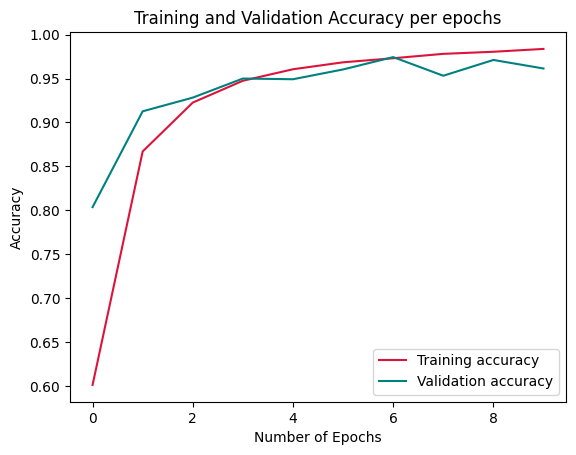

In [47]:
epochs = [i for i in range(10)]
plt.plot(epochs, training_history.history["accuracy"], color="crimson", label="Training accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color="teal", label="Validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per epochs")
plt.legend()
plt.show()